## Imports and Load data ##

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

train = pd.read_csv('../input/train.csv')

display(train.head())

/home/solmyr/.env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


## Features exploration ##

We use histograms to check distribution of features values.

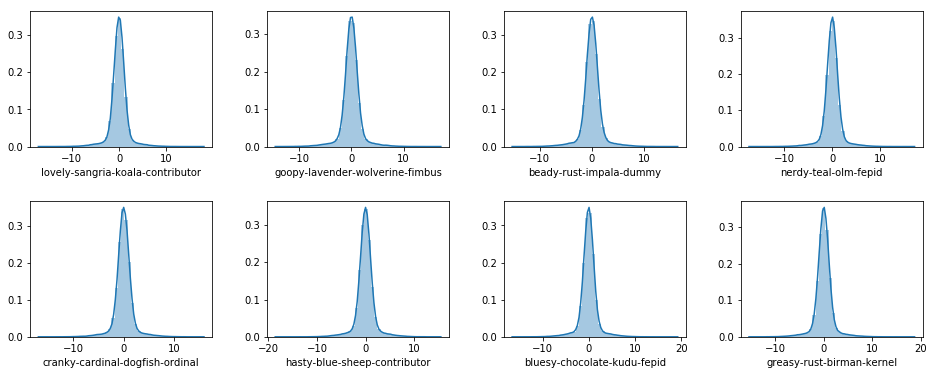

In [2]:
def plots_grid(n, cols=4, caption=None):
    """Generate grid of `n` plots aranged in `cols` columns."""
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(16, 3 * 16 / 4 * rows // cols))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    axes = axes.reshape((-1,))
    
    for ax in axes[n:]:
        ax.remove()
        
    if caption:
        fig.suptitle(caption, fontsize=20)
    
    return axes[:n]


# Show distribution of eigth random features
axes = plots_grid(n=8, cols=4)
columns = np.random.choice(train.columns, 8)

for ax, column in zip(axes, columns):
    sbn.distplot(train[column], ax=ax)


## Features distribution ##

All of the features seams to have somehow normal distribution, we can check that deeper using normality plot.

In [142]:
from scipy import stats
import random
import time

def normality_plot(data, ax, title=None):
    print('0:', time.time())
    
    x, y = stats.probplot(data)[0]
    print('1:', time.time())
    
    if len(x) > 500:  # limit number of points
#         idx = np.random.choice(len(x), 500)
        idx = list(random.choices(range(len(x)), k=530, replace=False))
        idx.sort()
        print(idx)
        print('2:', time.time())
        print('before', x.shape, y.shape, type(x), x.dtype)
#         x = np.array(x[idx])
#         y = np.array(y[idx])
#         idx = list(range(40))
        x = x[idx]
        y = y[idx]
        print('after', x.shape, y.shape, type(x), x.dtype)
        
    print(type(x))
    print('3:', time.time())
    df = pd.DataFrame(zip(x, y), columns=['x', 'y'])
    df.info()
    print('4:', time.time())
    plot = sbn.lineplot(x='x', y='y', data=df, ax=ax)
    print('5:', time.time())
    if title:
        plot.set_title(title)
    return plot

def per_column_normality(data):
    columns_no = len(data.columns)

    for i, ax in enumerate(plots_grid(n=columns_no, cols=4)):
        print(i)
        column_data = data[data.columns[i]]
        normality_plot(column_data, ax, f"{i}: {data.columns[i]}")
    
        
#per_column_normality(train.drop(['id', 'target'], axis=1))

## Analyze wheezy-copper-turtle-magic ##

Checking normality plots we figured out that there is one feature **wheezy-copper-turtle-magic** (column 147), 
with ditribution different from the others. It has almost uniform distribution over discrete values 0..511.

Additionaly rest of the features in fact doesn't have normal distribution, but is composed of two normal distributions with different deviations.


'wheezy-copper-turtle-magic'

count    262144.000000
mean        255.602486
std         147.920785
min           0.000000
25%         127.000000
50%         256.000000
75%         384.000000
max         511.000000
Name: wheezy-copper-turtle-magic, dtype: float64

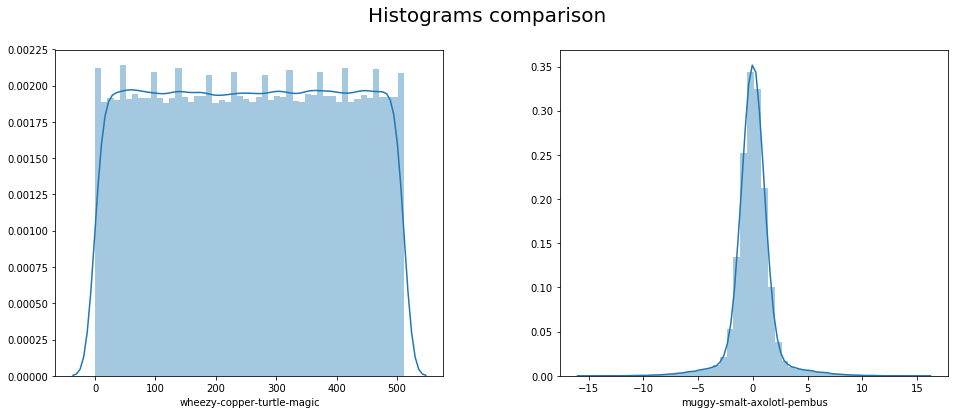

In [4]:
magic_col = train.columns[147]
display(magic_col)

# show magic column values distribution
ax0, ax1 = plots_grid(n=2, cols=2, caption='Histograms comparison')
sbn.distplot(train[magic_col], ax=ax0)
    
# Show other columns distribution
sbn.distplot(train[train.columns[1]], ax=ax1)

# Show magic_col statistics
display(train[magic_col].describe())

## Split data ##

We can split dataset based on value of magic column into 512 subdatasets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Columns: 256 entries, index to gamy-white-monster-expert
dtypes: float64(255), int64(1)
memory usage: 1.0 MB
None


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Columns: 258 entries, id to target
dtypes: float64(255), int64(2), object(1)
memory usage: 516.0+ MB
None


None


  0%|          | 0/4 [00:00<?, ?it/s]


RangeIndex(start=0, stop=534, step=1) RangeIndex(start=0, stop=262144, step=1)
0
>0 1560807105.2342815
>1 1560807105.234355
0: 1560807105.2343936
1: 1560807105.2360992


TypeError: choices() got an unexpected keyword argument 'replace'

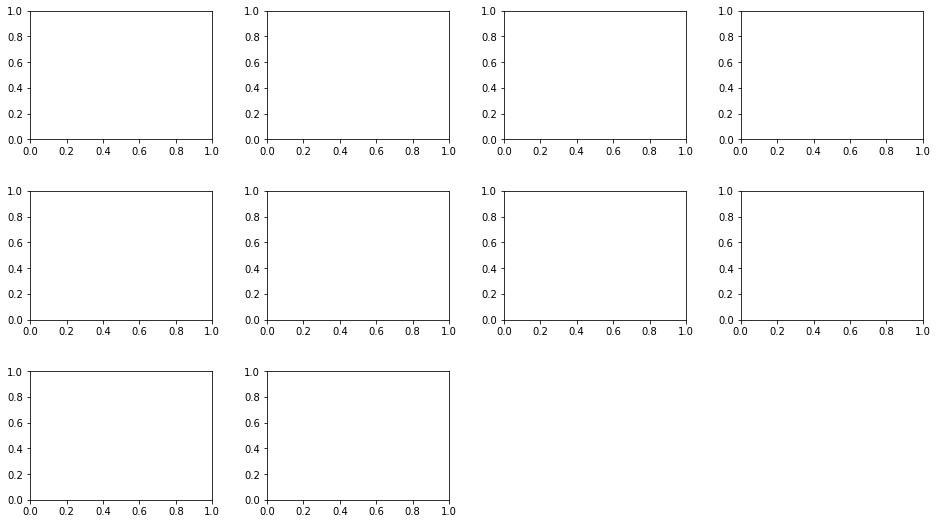

In [143]:
# data_0 = pd.DataFrame(train.[train[magic_col] == 0].drop(['id', magic_col, 'target'], axis=1).reset_index(), copy=True)
data_0 = train.loc[train[magic_col] == 0].drop(['id', magic_col, 'target'], axis=1).reset_index()
display(print(data_0.info()))
display(print(train.info()))
print(data_0.index, train.index)
# print(data_0.columns)
# data_0.info()
# print(data_0.shape)

# print(train.shape)
# data_0
# # per_column_normality(data_0)
from tqdm import tqdm
axes = plots_grid(10, 4)
for i in tqdm(range(4)):
    print(i)
#     np.histogram(data_0[data_0.columns[i]])
#     sbn.distplot(data_0[data_0.columns[i]], ax=axes[i])
    print('>0', time.time())
    d = data_0[data_0.columns[i+4]]
#     d = train[train.columns[i]]
    print('>1', time.time())
    normality_plot(d, axes[i])
    print('>2', time.time())
display(axes)